# OpenSAFELY COVID Vaccine coverage report: Second doses 

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is an extension of our [regular weekly report](https://reports.opensafely.org/reports/vaccine-coverage/) on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of January 13th) in our preprint paper available [here](https://www.medrxiv.org/content/10.1101/2021.01.25.21250356v2).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).

## Second doses

**Please note** This report is intended to highlight any differences between subgroups of priority cohorts in receiving second doses, only including those which are due (i.e. where at least 14 weeks has passed since the first dose). **It is therefore NOT a comprehensive view of all second doses given to date** - to see these figures please refer to the main report. 

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='png'

from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)
import sys
sys.path.append('../lib/')
from create_report import *

backend = os.getenv("OPENSAFELY_BACKEND", "expectations")
suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Second dose vaccinations included up to **{latest_date_fmt}** inclusive"))

with open(os.path.join("..", "interim-outputs","text", "latest_date_of_first_dose_for_due_second_doses.txt"), 'r') as file:
    latest_date_14w_fmt = file.read()
    
display(Markdown(
    f"### Only persons who had their first dose at least 14 weeks ago ({latest_date_14w_fmt}) are included in the 'due' group."))

### Report last updated **18 Jun 2021**

### Second dose vaccinations included up to **25 May 2021** inclusive

### Only persons who had their fist dose at least 14 weeks ago (16 Feb 2021) are included in the 'due' group.

##  
## Contents

**Cumulative second dose vaccination figures among:**
- [**80+** population](#Cumulative-second-dose-vaccination-figures-among-80+-population)
- [**70-79** population](#Cumulative-second-dose-vaccination-figures-among-70-79-population)
- [**Care home** population](#Cumulative-second-dose-vaccination-figures-among-care-home-population)
- [**Shielding (aged 16-69)** population](#Cumulative-second-dose-vaccination-figures-among-shielding-(aged-16-69)-population)
- [**65-69** population](#Cumulative-second-dose-vaccination-figures-among-65-69-population)
- [**LD (aged 16-64)** population](#Cumulative-second-dose-vaccination-figures-among-LD-(aged-16-64)-population)
- [**60-64** population](#Cumulative-second-dose-vaccination-figures-among-60-64-population)
- [**55-59** population](#Cumulative-second-dose-vaccination-figures-among-54-59-population)
- [**50-54** population](#Cumulative-second-dose-vaccination-figures-among-50-54-population)

The above groups are only included in the report once at least 70% of their total population are due second doses.

## 
 ## Cumulative second dose vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Second Doses due at 25 May (n)  \
Category                                  Group                                                                 
overall                                   overall                                                         447   
Sex                                       F                                                               224   
                                          M                                                               224   
Age band                                  0                                                                28   
                                          0-15                                                             28   
                                          16-29                                                            21   
                                          30-34                                                            28   
                                          35-39                                                            21   
                                          40-44                                                            28   
                                          45-49                                                            21   
                                          50-54                                                            42   
                                          55-59                                                            28   
                                          60-64                                                            28   
                                          65-69                                                            21   
                                          70-74                                                            42   
                                          75-79                                                            21   
                                          80-84                                                            35   
                                          85-89                                                            28   
                                          90+                                                              28   
Ethnicity (broad categories)              Black                                                            84   
                                          Mixed                                                            70   
                                          Other                                                            63   
                                          South Asian                                                      77   
                                          Unknown                                                          70   
                                          White                                                            77   
ethnicity 16 groups                        African                                                         28   
                                           Bangladeshi or British Bangladeshi                              21   
                                           Caribbean                                                       21   
                                           Chinese                                                         28   
                                           Other                                                           35   
                                           Other Asian                                                     21   
                                          British or Mixed British                                         14   
                                          Indian or British Indian                                         28   
                                          Irish                                                            28   
           

**Footnotes:**
- Patient counts rounded to the nearest 7

- Only persons who had their fist dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Second Doses Overdue Among 80+ Population

Second doses which have not been given 14 weeks since the first dose

Error bars indicate possible error caused by rounding

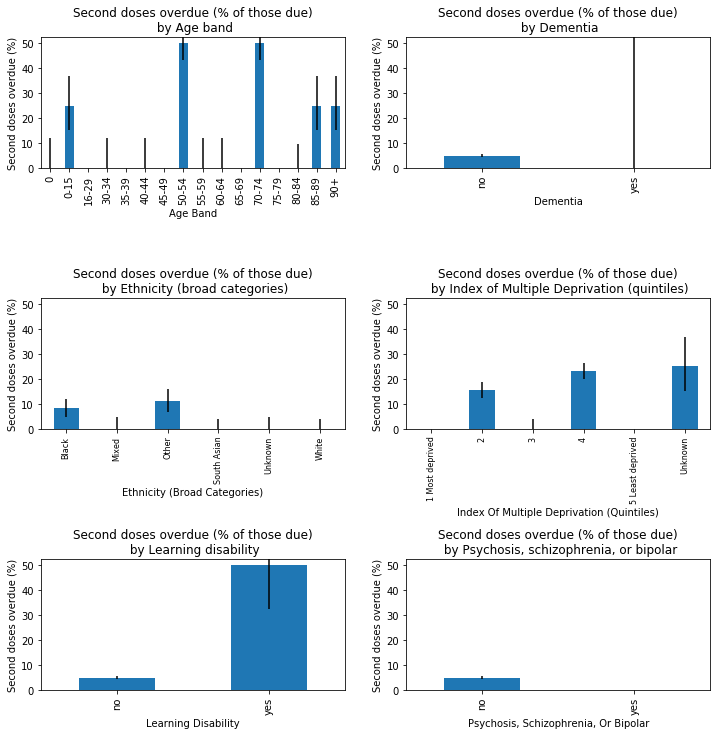

## 
 ## Cumulative second dose vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Second Doses due at 25 May (n)  \
Category                                  Group                                                                 
overall                                   overall                                                         746   
Sex                                       F                                                               364   
                                          M                                                               385   
Age band                                  0                                                                42   
                                          0-15                                                             49   
                                          16-29                                                            49   
                                          30-34                                                            35   
                                          35-39                                                            49   
                                          40-44                                                            56   
                                          45-49                                                            70   
                                          50-54                                                            35   
                                          55-59                                                            49   
                                          60-64                                                            49   
                                          65-69                                                            49   
                                          70-74                                                            49   
                                          75-79                                                            49   
                                          80-84                                                            35   
                                          85-89                                                            35   
                                          90+                                                              42   
Ethnicity (broad categories)              Black                                                           126   
                                          Mixed                                                           133   
                                          Other                                                           119   
                                          South Asian                                                     126   
                                          Unknown                                                         119   
                                          White                                                           133   
ethnicity 16 groups                        African                                                         28   
                                           Bangladeshi or British Bangladeshi                              42   
                                           Caribbean                                                       35   
                                           Chinese                                                         35   
                                           Other                                                           35   
                                           Other Asian                                                     35   
                                          British or Mixed British                                         35   
                                          Indian or British Indian                                         49   
                                          Irish                                                            28   
           

**Footnotes:**
- Patient counts rounded to the nearest 7

- Only persons who had their fist dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Second Doses Overdue Among 70-79 Population

Second doses which have not been given 14 weeks since the first dose

Error bars indicate possible error caused by rounding

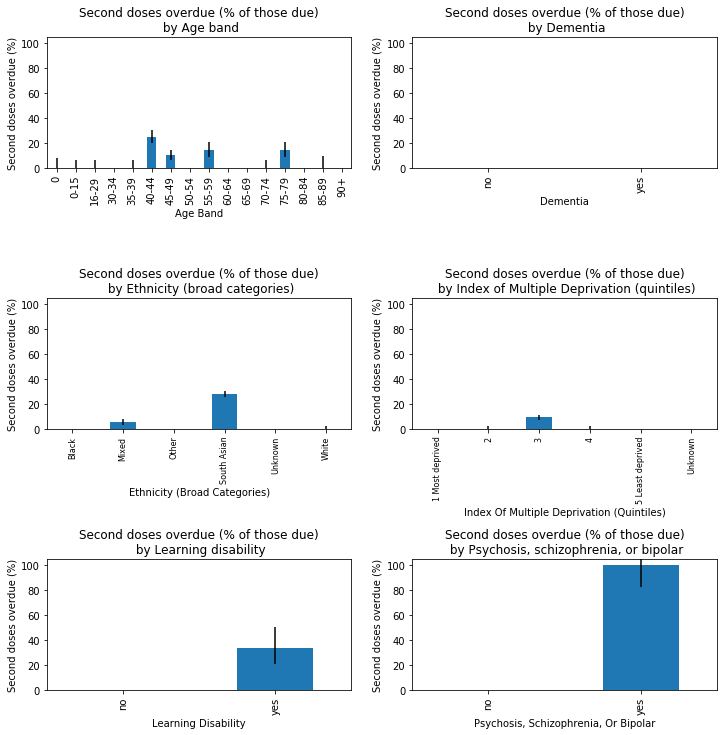

## 
 ## Cumulative second dose vaccination figures among care home population 
 Please refer to footnotes below table for information.

Second Doses due at 25 May (n)  \
Category                     Group                                         
overall                      overall                                 293   
Sex                          F                                       154   
                             M                                       140   
Age band                     0                                        14   
                             0-15                                     21   
                             16-29                                    14   
                             30-34                                    21   
                             35-39                                    21   
                             40-44                                    14   
                             45-49                                    14   
                             50-54                                    14   
                             55-59                                    21   
                             60-64                                    21   
                             65-69                                    21   
                             70-74                                    14   
                             75-79                                    21   
                             80-84                                    21   
                             85-89                                    14   
                             90+                                      21   
Ethnicity (broad categories) Black                                    35   
                             Mixed                                    49   
                             Other                                    56   
                             South Asian                              49   
                             Unknown                                  56   
                             White                                    49   
Dementia                     no                                      294   
                             yes                                       0   

                                          Second doses given (n)  \
Category                     Group                                 
overall                      overall                         283   
Sex                          F                               133   
                             M                               147   
Age band                     0                                21   
                             0-15                             21   
                             16-29                            14   
                             30-34                            14   
                             35-39                             7   
                             40-44                            14   
                             45-49                            14   
                             50-54                            14   
                             55-59                            21   
                             60-64                            21   
                             65-69                            21   
                             70-74                            21   
                             75-79                            14   
                             80-84                            21   
                             85-89                            21   
                             90+                              21   
Ethnicity (broad categories) Black                            49   
                             Mixed                            42   
                             Other                            56   
                             South Asian                      42   
                             Unknown                          42   
                             White                            56   
D

**Footnotes:**
- Patient counts rounded to the nearest 7

- Only persons who had their fist dose at least 14 weeks ago are included in the 'due' group.

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Second Doses Overdue Among Care Home Population

Second doses which have not been given 14 weeks since the first dose

Error bars indicate possible error caused by rounding

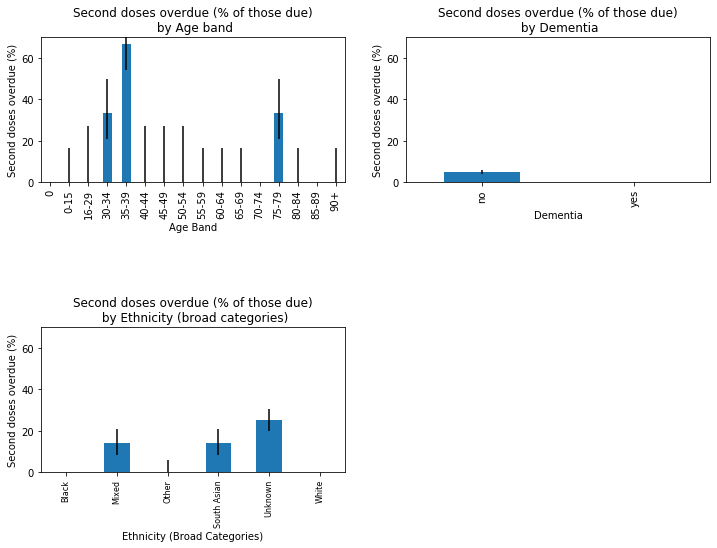

## 
 ## Cumulative second dose vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Second Doses due at 25 May (n)  \
Category                                  Group                                              
overall                                   overall                                       86   
newly shielded since feb 15               no                                            84   
                                          yes                                            0   
Sex                                       F                                             42   
                                          M                                             49   
Age band                                  16-29                                          7   
                                          30-39                                          7   
                                          40-49                                         14   
                                          50-59                                         14   
                                          60-69                                         14   
                                          70-79                                         21   
                                          80+                                           14   
Ethnicity (broad categories)              Black                                         14   
                                          Mixed                                         14   
                                          Other                                         14   
                                          South Asian                                    7   
                                          Unknown                                       14   
                                          White                                         21   
Index of Multiple Deprivation (quintiles) 1 Most deprived                               21   
                                          2                                             21   
                                          3                                              7   
                                          4                                             14   
                                          5 Least deprived                              14   
                                          Unknown                                        0   
Learning disability                       no                                            84   
                                          yes                                            0   

                                                            Second doses given (n)  \
Category                                  Group                                      
overall                                   overall                               91   
newly shielded since feb 15               no                                    91   
                                          yes                                    0   
Sex                                       F                                     42   
                                          M                                     49   
Age band                                  16-29                                  7   
                                          30-39                                 14   
                                          40-49                                 14   
                                          50-59                                 14   
                                          60-69                                 14   
                                          70-79                                 21   
                                          80+                                    0   
Ethnicity (broad categories)              Black                                 14   
                                          Mixed                                 14   
                                          Other    

**Footnotes:**
- Patient counts rounded to the nearest 7

- Only persons who had their fist dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

## 
 ## Second Doses Overdue Among Shielding (Aged 16-69) Population

Second doses which have not been given 14 weeks since the first dose

Error bars indicate possible error caused by rounding

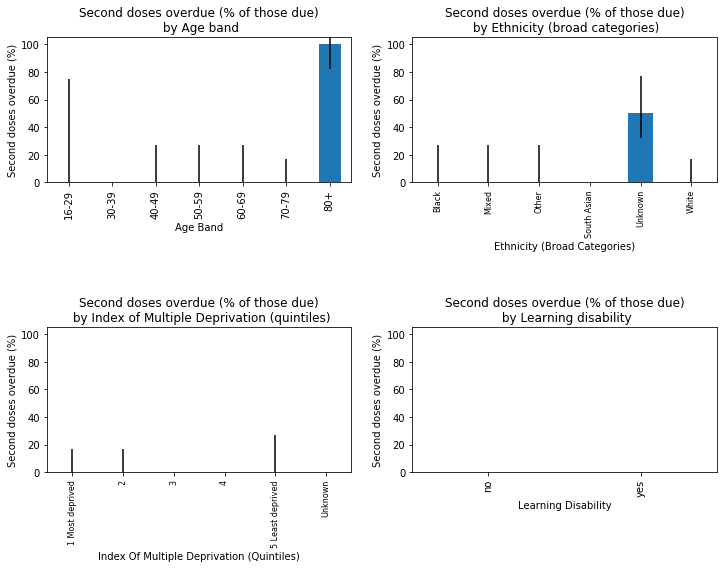

## 
 ## Cumulative second dose vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Second Doses due at 25 May (n)  \
Category                                  Group                                                                 
overall                                   overall                                                         499   
Sex                                       F                                                               252   
                                          M                                                               245   
Ethnicity (broad categories)              Black                                                            84   
                                          Mixed                                                            91   
                                          Other                                                            84   
                                          South Asian                                                      77   
                                          Unknown                                                          77   
                                          White                                                            84   
ethnicity 16 groups                        African                                                         28   
                                           Bangladeshi or British Bangladeshi                              28   
                                           Caribbean                                                       28   
                                           Chinese                                                         35   
                                           Other                                                           21   
                                           Other Asian                                                     21   
                                          British or Mixed British                                         21   
                                          Indian or British Indian                                         35   
                                          Irish                                                            21   
                                          Other Black                                                      28   
                                          Other White                                                      28   
                                          Other mixed                                                      28   
                                          Pakistani or British Pakistani                                   28   
                                          Unknown                                                          77   
                                          White + Asian                                                    21   
                                          White + Black African                                            21   
                                          White + Black Caribbean                                          35   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                  98   
                                          2                                                                98   
                                          3                                                                91   
                                          4                                                                91   
                                          5 Least deprived                                                 98   
                                          Unknown                                                          21   
BMI                                       30+                                                             126   
                                          under 30                                                        371   
Chronic car

**Footnotes:**
- Patient counts rounded to the nearest 7

- Only persons who had their fist dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are currently shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

## 
 ## Second Doses Overdue Among 65-69 Population

Second doses which have not been given 14 weeks since the first dose

Error bars indicate possible error caused by rounding

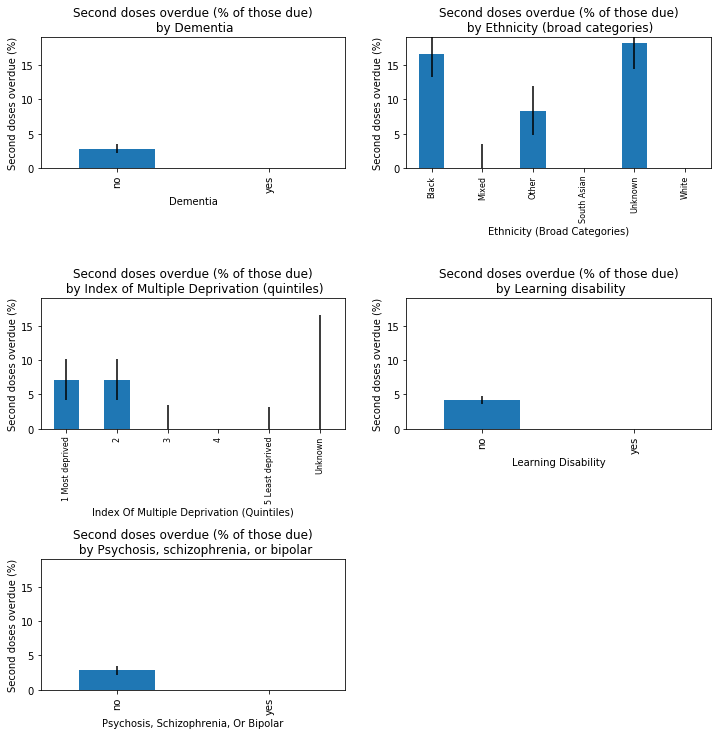

## 
 ## Cumulative second dose vaccination figures among LD (aged 16-64) population 
 Please refer to footnotes below table for information.

Second Doses due at 25 May (n)  \
Category                     Group                                         
overall                      overall                                 164   
Sex                          F                                        91   
                             M                                        77   
Age band                     0                                         7   
                             0-15                                      7   
                             16-29                                     7   
                             30-34                                     7   
                             35-39                                    14   
                             40-44                                     0   
                             45-49                                    14   
                             50-54                                    14   
                             55-59                                     7   
                             60-64                                     7   
                             65-69                                    14   
                             70-74                                     7   
                             75-79                                    14   
                             80-84                                    14   
                             85-89                                    14   
                             90+                                       7   
Ethnicity (broad categories) Black                                    14   
                             Mixed                                    35   
                             Other                                    28   
                             South Asian                              21   
                             Unknown                                  28   
                             White                                    35   

                                          Second doses given (n)  \
Category                     Group                                 
overall                      overall                         158   
Sex                          F                                91   
                             M                                70   
Age band                     0                                 7   
                             0-15                              0   
                             16-29                             7   
                             30-34                             7   
                             35-39                            14   
                             40-44                             7   
                             45-49                            14   
                             50-54                            14   
                             55-59                             7   
                             60-64                             0   
                             65-69                            14   
                             70-74                            14   
                             75-79                             7   
                             80-84                            14   
                             85-89                             7   
                             90+                              14   
Ethnicity (broad categories) Black                            28   
                             Mixed                            21   
                             Other                            35   
                             South Asian                      21   
                             Unknown                          21   
                             White                            35   

                                          Second doses given (% of due)  \
Category                     Group                                        
ov

**Footnotes:**
- Patient counts rounded to the nearest 7

- Only persons who had their fist dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those who are currently shielding.

## 
 ## Second Doses Overdue Among Ld (Aged 16-64) Population

Second doses which have not been given 14 weeks since the first dose

Error bars indicate possible error caused by rounding

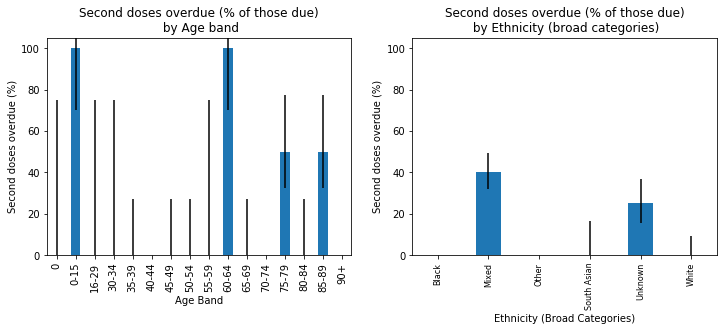

In [2]:

tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                    pre_string="among ", tail_string=" population.csv",
                                    population_subset="Cumulative first dose 14w ago",
                                    files_to_exclude=["Cumulative first dose 14w ago vaccination figures among 16-64, not in other eligible groups shown population.csv"],
                                    )
    
# get 2nd dose figures for each group
tablelist_2nd = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                        pre_string="among ", tail_string=" population.csv",
                                        population_subset="Cumulative second dose vaccination",
                                        files_to_exclude=["Cumulative second dose vaccination figures among 16-64, not in other eligible groups shown population.cscv"],
                                        )


for f, f2 in zip(tablelist, tablelist_2nd):
    df, _ = import_table(f, latest_date_fmt=latest_date_14w_fmt, show_carehomes=True, suffix=suffix, export_csv=False)
    df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
    
    df2, title = import_table(f2, latest_date_fmt, show_carehomes=True, suffix=suffix, export_csv=False)
    df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
    
    # column renaming and number formatting
    for c in df2.columns:
        if "(n)" in c:
            df2[c] = pd.to_numeric(df2[c], downcast='integer')
            df2 = df2.rename(columns={c:"Second doses given (n)"})
    for c in df.columns:
        if "(n)" in c:
            # the number of second doses due is the number of first doses given 14 w ago
            df = df.rename(columns={c:f"Second Doses due at {latest_date_fmt.replace(' 2021','')} (n)"})
            
    df = df2.join(df)
    
    df = df.rename(columns={"Total eligible":"Total population"})

    # only show tables where a significant proportion of the total population are due second dose
    df["Second Doses due (% of total)"] = 100*df[f"Second Doses due at {latest_date_fmt.replace(' 2021','')} (n)"]\
                                          /df["Total population"]
    if backend != "expectations" and (
        df["Second Doses due (% of total)"][("overall","overall")] < 0.70):
        continue    
    df = df.drop("Second Doses due (% of total)", 1)
    
    # calculate difference from expected
    df["Second doses given (% of due)"] = 100*(df[f"Second doses given (n)"]/\
                                                 df[f"Second Doses due at {latest_date_fmt.replace(' 2021','')} (n)"]).round(3)
                                             

        
    # column order
    df = df[[f"Second Doses due at {latest_date_fmt.replace(' 2021','')} (n)", 
             "Second doses given (n)", "Second doses given (% of due)", "Total population"]]

    export_path = os.path.join("..", "output", "second_doses")
    if not os.path.exists(export_path):
        os.makedirs(export_path)
    df.to_csv(os.path.join(export_path, f"{title}{suffix}.csv"), index=True)
    
    show_table(df, title, latest_date_fmt, show_carehomes=True)    
    
    df["Second doses overdue (% of due)"] = 100 - df["Second doses given (% of due)"]
    
    ######### plot charts

    display(Markdown(f"## \n ## {title.replace('Cumulative ','').replace(' vaccination figures', 's overdue').title()}"))
    
    cats_to_include = ["Age band", "Ethnicity (broad categories)", 
                   "Index of Multiple Deprivation (quintiles)", "Dementia", 
                   "Learning disability", "Psychosis, schizophrenia, or bipolar"]
    cats = [c for c in df.index.levels[0] if c in cats_to_include]
    
    # find ymax
    ymax = df[["Second doses overdue (% of due)"]].loc[cats].max()[0]
    
    # find errors based on rounding
    # both num and denom are rounded to nearest 7 so both may be out by <=3 
    df["pos_error"] = 100*3/(df[f"Second Doses due at {latest_date_fmt.replace(' 2021','')} (n)"]-3)
    df["neg_error"] = 100*3/(df[f"Second Doses due at {latest_date_fmt.replace(' 2021','')} (n)"]+3)
    
    rows_of_charts = int(len(cats)/2 + (len(cats)%2)/2)
    fig, axs = plt.subplots(rows_of_charts, 2, figsize=(12, 4*rows_of_charts))
    
    # unpack all the axes subplots
    axes = axs.ravel()
    # turn off axes until they are used
    for ax in axes:
        ax.set_axis_off()
        
    # plot charts and display titles
    for n, cat in enumerate(cats):
        chart_title = "Second doses overdue (% of those due)\n by "+ cat
        dfp=df.loc[cat]
        dfp[["Second doses overdue (% of due)"]].plot.bar(title=chart_title, ax=axes[n], legend=False)
        # add errorbars
        axes[n].errorbar(dfp.index, dfp["Second doses overdue (% of due)"], # same location as each bar
                         yerr=[dfp["neg_error"], dfp["pos_error"]], #"First row contains the lower errors, the second row contains the upper errors."
                         fmt="none", # no markers or connecting lines
                         ecolor='k')
        axes[n].set_axis_on()
        axes[n].set_ylim([0, min(125, ymax*1.05)])
        axes[n].set_ylabel("Second doses overdue (%)")
        axes[n].set_xlabel(cat.title())
        
        # reduce tick label sizes
        if (cat == "Ethnicity (broad categories)") | (cat == "Index of Multiple Deprivation (quintiles)"):
            plt.setp(axes[n].get_xticklabels(), fontsize=8)
    plt.subplots_adjust(hspace=1)
    display(Markdown("Second doses which have not been given 14 weeks since the first dose"),
           Markdown("Error bars indicate possible error caused by rounding"))
        
    plt.show()
    
